In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3. Calculate stress at each fringe location for unnotched beam, plot stress vs. fringe order. Find fringe constant

In [2]:
thickness = 0.2165 #in
I_moment = (1/12)*thickness*(0.9975**3)
F = 125
fringe_location = np.array([0, 0.5, 1, 1.5, 2])
import sympy as sym
from sympy import *
L_1, L_2, L_3, L_4 = sym.symbols('L_1, L_2, L_3, L_4')
eq1 = sym.Eq(L_3 - L_2, 2)
eq2 = sym.Eq(L_3 + L_2, 5)
sym.solve((eq1, eq2), (L_2, L_3))

{L_2: 3/2, L_3: 7/2}

In [3]:
eq3 = sym.Eq(L_4 - L_1, 4)
eq4 = sym.Eq(L_1 + L_4, 5)
sym.solve((eq3, eq4), (L_1, L_4))

{L_1: 1/2, L_4: 9/2}

In [4]:
L_1 = 0.5
L_2 = 1.5
L_3 = 3.5
L_4 = 4.5
M = (F*(L_2 - L_1)*0.225) / 2 #convert to lbf in

In [5]:
print(M, "lbf in")

14.0625 lbf in


In [6]:
z = np.array([0, (0.657-0.522), (0.754-0.522), (0.872-0.522), (0.973-0.522)])
print(I_moment)
sigma = (M * z) / I_moment
print(sigma)

0.017906692166015627
[  0.         106.01832446 182.19445388 274.86232267 354.17973578]


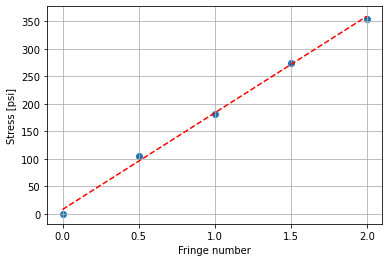

In [7]:
plt.scatter(fringe_location, sigma)
plt.xlabel('Fringe number')
plt.ylabel('Stress [psi]')
plt.grid()
z = np.polyfit(fringe_location, sigma, 1)
p = np.poly1d(z)
plt.plot(fringe_location,p(fringe_location),"r--")
plt.xticks(np.linspace(0,2,5))
plt.show()

In [8]:
#Equation of trendline
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

y=175.440694x+(8.010273)


In [9]:
slope = z[0]

In [10]:
#fringe constant
f_sigma = slope*thickness
print(f_sigma)

37.98291024072136
